DS 07.12.22
Final Project Submission
Misaki Fuentes-Maruyama

In [35]:
import numpy as np #import numpy as np is a common abbreviation and alias for the library
import pandas as pd #import pandas as pd is a common abbreviation and alias for the library
import matplotlib.pyplot as plt #import matplotlib.pyplot as plt is a common abbreviation and alias for the library
plt.rcParams['figure.figsize']=(20.0, 10.0)

#Dataset was downloaded from Kaggle. url (https://www.kaggle.com/datasets/danofer/law-school-admissions-bar-passage)
#Law School Admissions dataset from the Law School Admissions Council (LSAC) from 1991 through 1997.
#LSAC tracked some twenty-seven thousand law students through law school, graduation, and sittings for bar exams.
df = pd.read_csv('bar_pass_prediction.csv') #assigning the pandas read function for our dataset file to the alias df

In [33]:
df.shape #shape identifies the number of rows and columns

(22407, 39)

In [34]:
df.head(10) #head allows the user to pull a specified number of rows from the dataset

,decile1b,decile3,ID,decile1,sex,race,cluster,lsat,ugpa,zfygpa,...,hisp,pass_bar,bar,bar_passed,tier,index6040,indxgrp,indxgrp2,dnn_bar_pass_prediction,gpa
0,10.0,10.0,2,10.0,1.0,7.0,1.0,44.0,3.5,1.33,...,0,1,a Passed 1st time,True,4.0,886.842082,g 700+,i 820+,0.979804,3.5
1,5.0,4.0,3,5.0,1.0,7.0,2.0,29.0,3.5,-0.11,...,0,1,a Passed 1st time,True,2.0,649.999987,f 640-700,f 640-700,0.979804,3.5
2,3.0,2.0,36,3.0,2.0,7.0,3.0,36.0,3.5,-0.64,...,0,1,a Passed 1st time,True,3.0,760.526298,g 700+,h 760-820,0.979804,3.5
3,7.0,4.0,52,7.0,2.0,7.0,3.0,39.0,3.5,0.34,...,0,1,a Passed 1st time,True,3.0,807.894717,g 700+,h 760-820,0.979804,3.5
4,9.0,8.0,55,9.0,2.0,7.0,4.0,48.0,3.5,1.02,...,0,1,a Passed 1st time,True,5.0,949.999974,g 700+,i 820+,0.979804,3.5
5,3.0,5.0,72,3.0,1.0,7.0,3.0,40.0,3.5,-0.64,...,0,1,a Passed 1st time,True,3.0,823.684190,g 700+,i 820+,0.979804,3.5
6,9.0,7.0,74,9.0,1.0,7.0,3.0,34.0,3.5,0.96,...,0,1,a Passed 1st time,True,3.0,728.947352,g 700+,g 700-760,0.979804,3.5
7,10.0,10.0,89,10.0,2.0,7.0,3.0,40.0,3.5,1.34,...,0,1,a Passed 1st time,True,3.0,823.684190,g 700+,i 820+,0.979804,3.5
8,4.0,2.0,109,4.0,2.0,7.0,4.0,40.0,3.5,-0.44,...,0,1,a Passed 1st time,True,5.0,823.684190,g 700+,i 820+,0.979804,3.5
9,7.0,5.0,143,7.0,1.0,4.0,6.0,28.0,3.5,0.48,...,0,0,c Failed,False,1.0,634.210514,e 580-640,e 580-640,0.979804,3.5


In [38]:
#The linear regression model requires variables with continous data.
#My thesis is the higher the undergraduate GPA the higher the lsat score.

X = df['ugpa'].values #assigning undergraduate gpa as the X variable or independent variable
Y = df['lsat'].values #assigning lsat score as the Y variable or independent variable

mean_x = np.mean(X) #calculating the mean of the X variable
mean_y = np.mean(Y) #calculating the mean of the Y variable

n= len(X) #total number of values in the sample

#the following formula will calculate the m(b1) and c(b0) values
numer = 0
denom = 0
for i in range (n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer/denom
b0 = mean_y - (b1 * mean_x)

print(b1, b0) #show coefficients for y=mx+b or the regression line

3.2864113134798414 26.20061435442568


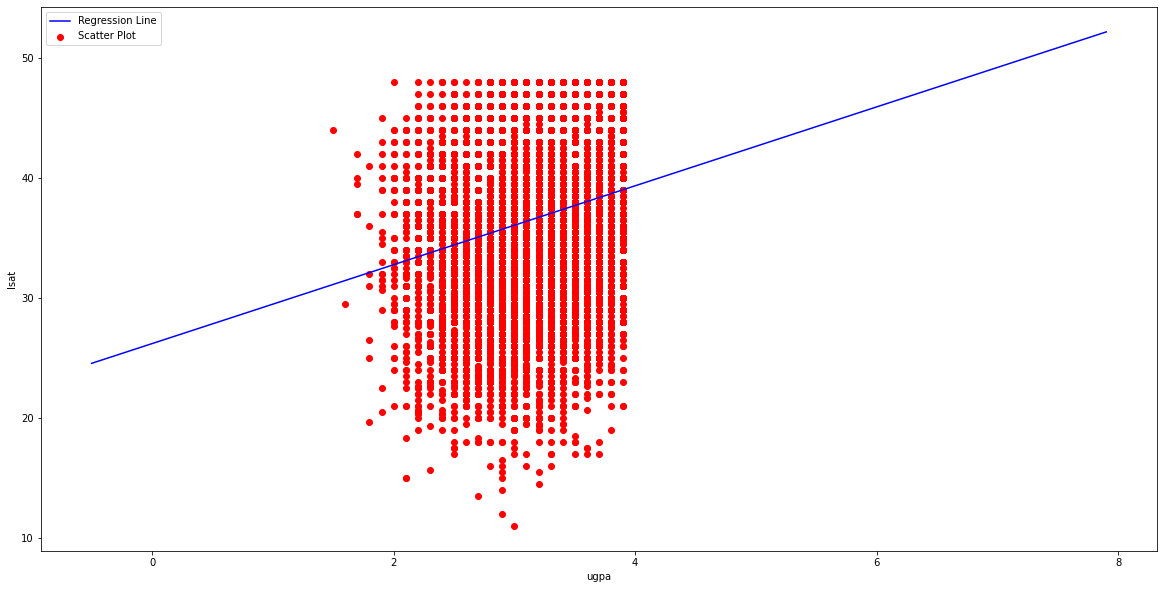

In [45]:
#plot the values for the regression line
max_x = np.max(X) + 4
min_x = np.min(X) - 2

#calculate line values x and y
x = np.linspace (min_x, max_x, 1000)
y = b0 + b1 * x

#plot the regression line on the scatter plot
plt.plot(x, y, color = 'b', label = 'Regression Line')

plt.scatter(X, Y, c = 'r', label = 'Scatter Plot') #plot the values for the below scatter plot graph
plt.xlabel('ugpa') #assign the x-axis label as ugpa
plt.ylabel('lsat') #assign the y-axis label as lsat
plt.legend() # create legend for scatter plot and regression line
plt.show() #show scatter plot

In [61]:
#The follow calculations will determine the r2 for the linear regression model.
ss_t = 0 #the sum of squares
ss_r = 0 #the sum of squares of residuals
for i in range (n):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y)**2
    ss_r += (Y[i] - y_pred)**2
r2 = 1 - (ss_r/ss_t)
print(r2) #show the calculated r2

0.05908275601176016


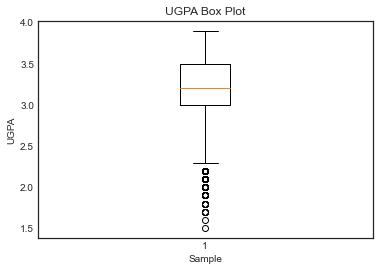

In [65]:
#The distribution of the UGPA values or X variable can be assessed with a box plot.
fig, ax1 = plt.subplots()

ax1.set_title('UGPA Box Plot') #assigning the title as UGPA Box Plot
ax1.set_xlabel('Sample') #assigning the x-axis label as Sample
ax1.set_ylabel('UGPA') #assigning the y-axis label as UGPA

#the boxplot and show functions via matplotlib.pyplot library
box_plot_data=[X] #assigning the X values to box_plot_data 
plt.boxplot(box_plot_data) #create box plot with the box plot data
plt.show() #show box plot

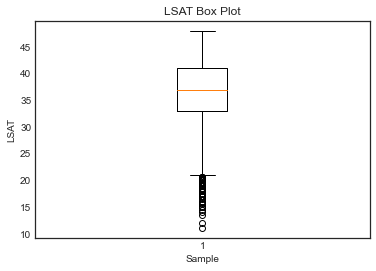

In [66]:
#The distribution of the LSAT values or Y variable can be assessed with a box plot.
fig, ax1 = plt.subplots()

ax1.set_title('LSAT Box Plot') #assigning the title as LSAT Box Plot
ax1.set_xlabel('Sample') #assigning the x-axis label as Sample
ax1.set_ylabel('LSAT') #assigning the y-axis label as LSAT

#the boxplot and show functions via matplotlib.pyplot library
box_plot_data=[Y] #assigning the Y values to box_plot_data 
plt.boxplot(box_plot_data) #create box plot with the box plot data
plt.show() #show box plot

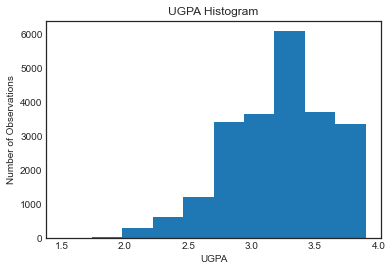

In [71]:
#Another method of assessing the distribution of the UGPA values or X variable is a histogram.

fig, ax1 = plt.subplots()
ax1.set_title('UGPA Histogram') #assigning the title as UGPA Histogram
ax1.set_xlabel('UGPA') #assigning the x-axis label as UGPA
ax1.set_ylabel('Number of Observations') #assigning the y-axis label as Number of Observations

plt.style.use('seaborn-white') #assigning the seaborn-white style for our histogram
plt.hist(X);

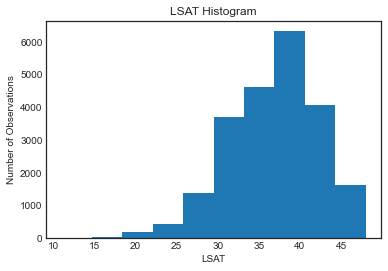

In [70]:
#Another method of assessing the distribution of the LSAT values or Y variable is a histogram.

fig, ax1 = plt.subplots()
ax1.set_title('LSAT Histogram') #assigning the title as LSAT Histogram
ax1.set_xlabel('LSAT') #assigning the x-axis label as LSAT
ax1.set_ylabel('Number of Observations') #assigning the y-axis label as Number of Observations

plt.style.use('seaborn-white')
plt.hist(Y);

Project Conclusion: A linear regression model provides insight into the relationship between an independent and dependent variable. The thesis for my final project was a higher gpa score would indicate a higher lsat score. It appears the ugpa or undergraduate gpa had a positive correlation with the lsat or lsat score. The dataset selected from Kaggle has 22,407 observations, which is a large sample. The box plots and histograms allow for the distribution of the data to be assessed. The data appears to be positively skewed, which is not surprising given that the variables are gpa and lsat scores. To summarize, python libraries such as pandas and matplotlib allow for the application of a linear regression model against datasets with continous variables to test a thesis on the relationship between an independent and dependent variable.